`clip-01`

In [1]:
using StatisticalRethinking
gr(size=(500,500));

ProjDir = @__DIR__

"/Users/rob/.julia/dev/StatisticalRethinking/notebooks/09"

### snippet 9.1

Metropolis algorithm

In [2]:
function generate_walk(N::Int64)
  num_weeks = N
  positions = zeros(Int64, num_weeks);
  current = 10
  d = Uniform(0, 1)

  for i in 1:N
    # Record current position
    positions[i] = current
    # Flip a coin to generate proposal
    proposal = current + sample([-1, 1], 1)[1]
    # Make sure it stays on achipelago
    proposal = proposal < 1  ? 10 : proposal
    proposal = proposal > 10  ? 1 : proposal
    # Move?
    prob_move = proposal/current
    current = rand(d, 1)[1] <  prob_move ? proposal : current

  end

  positions

end

generate_walk (generic function with 1 method)

Generate the visits

In [3]:
N = 100000
walk = generate_walk(N)

100000-element Array{Int64,1}:
 10
 10
  9
 10
  9
 10
  9
 10
  9
 10
  ⋮
  4
  3
  2
  3
  2
  3
  4
  3
  2

Plot the first 100 weeks and a histogram of weeks per iosland

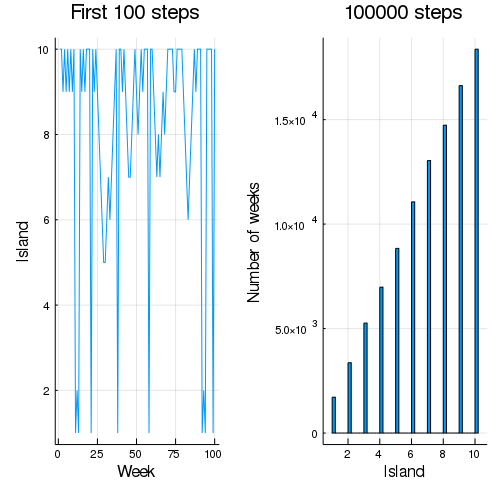

In [4]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)
p[1] = plot(walk[1:100], leg=false, xlabel="Week", ylabel="Island", title="First 100 steps")
p[2] = histogram(walk, leg=false, xlabel="Island", ylabel="Number of weeks",
  title="$N steps")
plot(p..., layout=(1, 2))

End of `clip-01.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*